In [20]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.19.0


In [21]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape

(60000, 28, 28)

In [23]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = tf.keras.Conv2D(32, 3, activation='relu')
    self.flatten = tf.keras.layers.Flatten()
    self.d1 = tf.keras.layers.Dense(128, activation='relu')
    self.d2 = tf.keras.layers.Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

In [24]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )

In [26]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6762 - loss: 8.2117
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7331 - loss: 0.7326
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7795 - loss: 0.6060
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8044 - loss: 0.5615
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8185 - loss: 0.5173
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8223 - loss: 0.5188
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8263 - loss: 0.4995
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8291 - loss: 0.4943
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8284 - loss: 0.5222
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8379 - loss: 0.4670


In [27]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([3.6305254e-22, 1.1463375e-22, 0.0000000e+00, 2.7752336e-22,
       0.0000000e+00, 4.8527282e-02, 0.0000000e+00, 6.5808203e-03,
       6.2560280e-19, 9.4489205e-01], dtype=float32)

In [28]:
predicted_class = np.argmax(predictions[0])
print(f"Predicted class for the first image: {class_names[predicted_class]}")
print(f"Actual class for the first image: {class_names[test_labels[0]]}")

Predicted class for the first image: Ankle boot
Actual class for the first image: Ankle boot


In [29]:
predicted_classes = np.argmax(predictions, axis=1)

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predicted_classes)

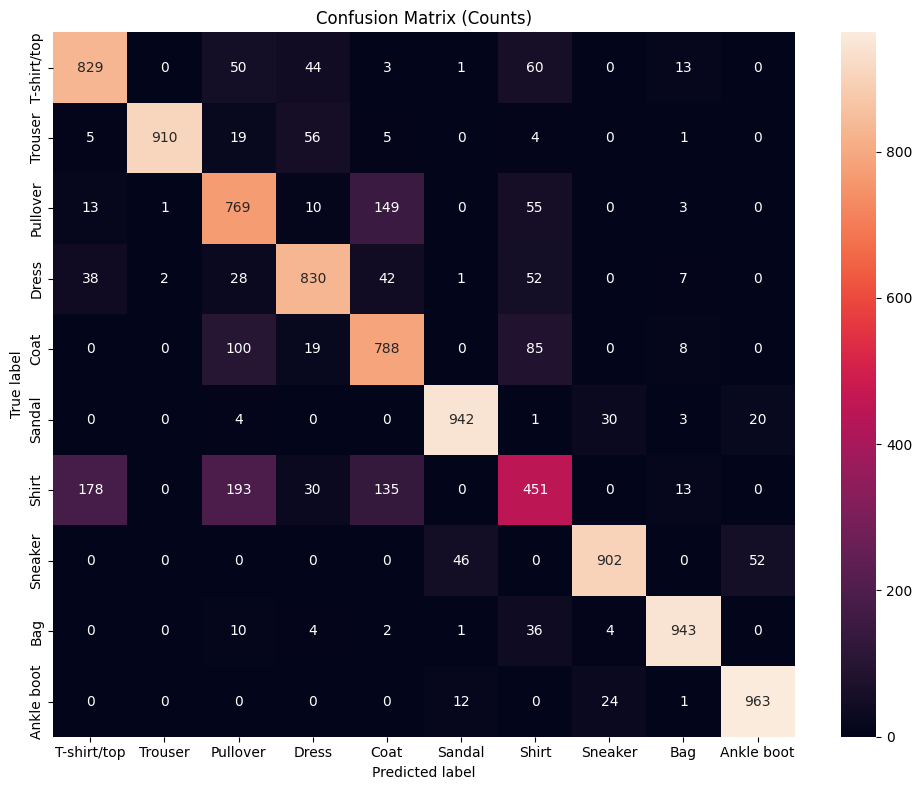

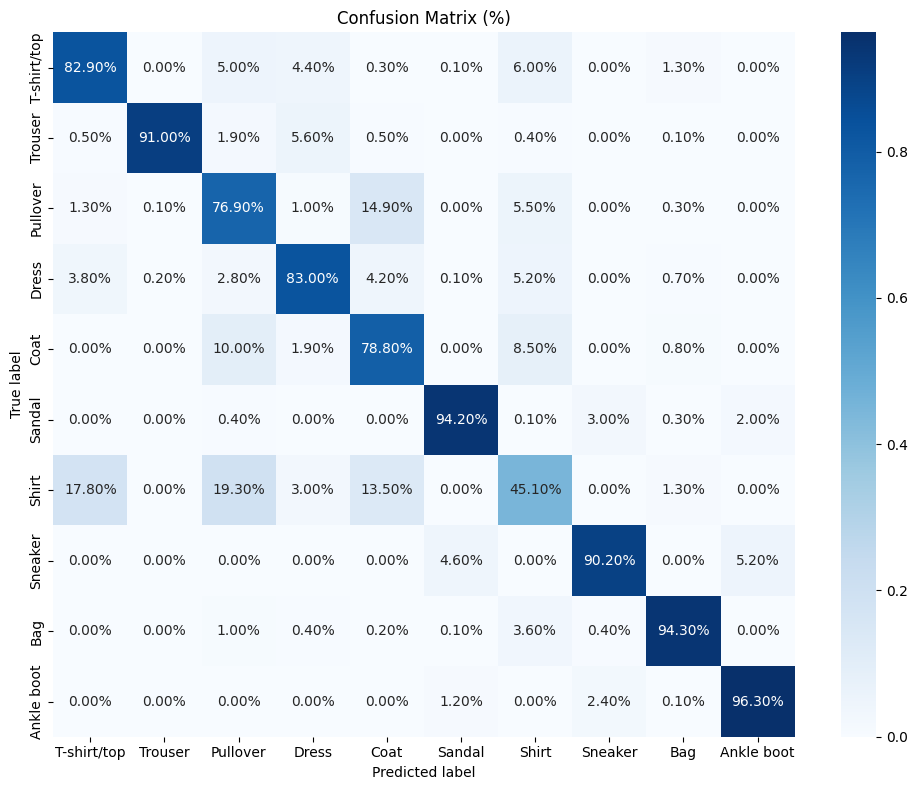

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (Counts)')
plt.tight_layout()
plt.show()

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (%)')
plt.tight_layout()
plt.show()

## Results

* **Overall Accuracy**: 84.67%
* **Best Performing Categories**:
   * Ankle boot (96.3%)
   * Bag (94.3%)
   * Sandal (94.2%)
   * Trouser (91.0%)
   * Sneaker (90.2%)
* **Most Challenging**: Shirt (45.1%) - often confused with similar upper-body garments

## Key Insights

* Model excels at identifying items with **distinctive shapes** (footwear, accessories)
* Struggles with **visually similar clothing** (shirts, pullovers, coats)
* Confusion matrix reveals misclassification patterns:
   * **Shirt** → T-shirt/top (17.8%), Pullover (19.3%), Coat (13.5%)
   * **Pullover** ↔ **Coat** frequently confused (14.9% and 10.0%)
* Minimal overfitting: training and validation accuracy closely aligned (~84.8% vs 84.7%)